# Merging, Joining & Concatenating 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('courses.csv') 
df2 = pd.read_csv('students.csv') 
df3 = pd.read_csv('reg-month1.csv') # n0v
df4 = pd.read_csv('reg-month2.csv') # dec
df5 = pd.read_csv('matches.csv')
df6 = pd.read_csv('deliveries.csv')

## Concatenate DataFrames
concat() function does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. In this example, three DataFrames (df1, df2, and df3) with identical columns but different indices are created. Using pd.concat(), these Pandas DataFrames are vertically stacked, resulting in a combined DataFrame where rows from each original DataFrame follow one another.

In [4]:
regs = pd.concat([df3,df4],ignore_index = True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [11]:
multi = pd.concat([df3,df4],keys=['df3','df4'])
multi.loc[('df3',0)]

student_id    23
course_id      1
Name: (df3, 0), dtype: int64

In [15]:
pd.concat([df3,df4],axis = 1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


## Merging DataFrame
Pandas have options for high-performance in-memory merging and joining. When we need to combine very large DataFrames, joins serve as a powerful way to perform these operations swiftly. Joins can only be done on two DataFrames at a time, denoted as left and right tables. The key is the common column that the two DataFrames will be joined on. It’s a good practice to use keys which have unique values throughout the column to avoid unintended duplication of row values. Pandas provide a single function, merge(), as the entry point for all standard database join operations between DataFrame objects.

There are four basic ways to handle the join (inner, left, right, and outer), depending on which rows must retain their data.


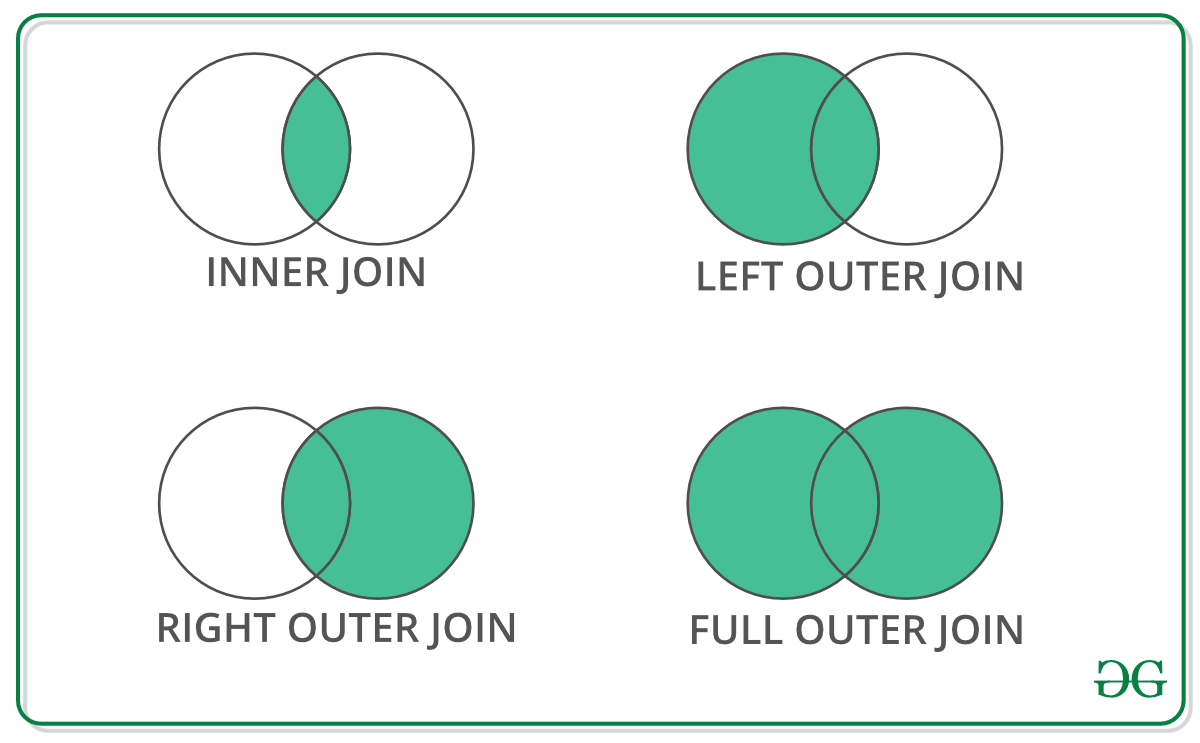

## Join

### 1. Inner join
Keeping Only Matching Rows
An inner join keeps rows from both DataFrames where there is a match in the specified column(s).

In [18]:
df2.merge(regs,how = 'inner',on = 'student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


### 2. left join
The pd.merge() function with how='left' performs a left join, merging the left DataFrame with the right DataFrame on the ‘Key’ column. All rows from the left DataFrame are retained, and matching rows from the right DataFrame are appended with their respective values.

In [20]:
df1.merge(regs,how = 'left',on = 'course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


### 3. right join
The pd.merge() function with how='right' performs a right join, merging the left DataFrame with the right DataFrame on the ‘Key’ column. All rows from the right DataFrame are retained, and matching rows from the left DataFrame are appended with their respective values.

In [22]:
temp_df = pd.DataFrame(
    {
        'student_id':[26,27,28],
        'name':['Ankit','Rahul','Rohit'],
        'partner':[28,26,17]
    }
)
df2 = pd.concat([df2, temp_df],ignore_index = True)
df2

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [23]:
df2.merge(regs,how='right',on = 'student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [24]:
df2.merge(regs,how= 'left',on= 'student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1.0
1,1,Kailash Harjo,23,6.0
2,1,Kailash Harjo,23,10.0
3,1,Kailash Harjo,23,9.0
4,2,Esha Butala,1,5.0
5,3,Parveen Bhalla,3,3.0
6,3,Parveen Bhalla,3,5.0
7,4,Marlo Dugal,14,NaN
8,5,Kusum Bahri,6,NaN
9,6,Lakshmi Contractor,10,NaN


### 4. full outer join
The pd.merge() function with how='outer' performs a full outer join, merging the left DataFrame with the right DataFrame on the ‘Key’ column. This results in a DataFrame that contains all rows from both the left and right DataFrames, filling in missing values with NaN where there isn’t a match.

In [25]:
df2.merge(regs,how='outer',on= 'student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
...,...,...,...,...
58,27,Rahul,26.0,NaN
59,28,Rohit,17.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0


In [26]:
regs.merge(df2,how='outer',on= 'student_id')

,student_id,course_id,name,partner
0,1,1.0,Kailash Harjo,23.0
1,1,6.0,Kailash Harjo,23.0
2,1,10.0,Kailash Harjo,23.0
3,1,9.0,Kailash Harjo,23.0
4,2,5.0,Esha Butala,1.0
...,...,...,...,...
58,27,NaN,Rahul,26.0
59,28,NaN,Rohit,17.0
60,38,1.0,NaN,NaN
61,42,9.0,NaN,NaN


### 1. find total revenue generated by the company

In [30]:
Total_revenue = regs.merge(df1,how= 'inner', on = 'course_id')['price'].sum()
Total_revenue

154247

### 2. find month by month revenue

In [36]:
temp_df = pd.concat([df3,df4],keys = ['df3','df4']).reset_index()
temp_df.merge(df1, on = 'course_id').groupby('level_0')['price'].sum().sum()

154247

### 3. Print the registration table

In [38]:
regs.merge(df2,on='student_id').merge(df1,on= 'course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


### 4. plot bar chart for revenue/courses

<Axes: xlabel='course_name'>

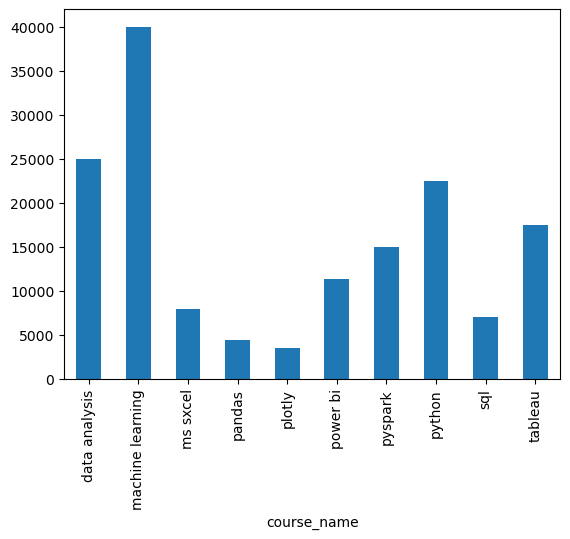

In [42]:
regs.merge(df1,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

### 5. find students who enrolled in both the months

In [45]:
common_student_id = np.intersect1d(df3['student_id'],df4['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23], dtype=int64)

In [47]:
df2[df2['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


### 6. find course that got no enrollment

In [50]:
course_id_list = np.setdiff1d(df1['course_id'],regs['course_id'])
df1[df1['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


### 7. find students who did not enroll into any course

In [51]:
student_id_list = np.setdiff1d(df2['student_id'],regs['student_id'])
df2[df2['student_id'].isin(student_id_list)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Ankit,28
26,27,Rahul,26
27,28,Rohit,17


### 8. print students name --> partner name for all enrolled students

In [54]:
# self join
df2.merge(df2,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


### 9. find top 3 students who did most number enrollments

In [64]:
regs.merge(df2,on= 'student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

### 10. find top 3 students who spent most amount of money on course

In [66]:
regs.merge(df2,on='student_id').merge(df1,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [67]:
# Alternate syntax for merge
pd.merge(df2,regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


### 11. find top 3 students with highest sixes/match ratio

In [71]:
temp_df = df6.merge(df5,left_on = 'match_id',right_on='id')

In [73]:
six_df = temp_df[temp_df['batsman_runs'] == 6]

In [75]:
# stadium --> sixes
num_sixes = six_df.groupby('venue')['venue'].count()

In [79]:
num_matches = df5['venue'].value_counts()

In [84]:
(num_sixes/num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

### 12.  find orange cap holder of all the season

In [92]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
